In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


from google.colab import files
ec= files.upload()

data = pd.read_csv("banana_quality.csv")
np.random.seed(5)

data.head()

Saving banana_quality.csv to banana_quality.csv


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [2]:
data.describe()
#Los datos ya estan normalizados

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [3]:
#Verificar si existen valores nulos o vacios

data.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [4]:
#Transformar los valores de la columna Quality en valores numericos Bueno=1 Malo=0

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
for i in ['Quality']:
    data[i] = encode.fit_transform(data[i])
data.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


(5600, 7)
(2400, 7)
(5600,)
(2400,)
Precision =  18.82 %
Precision Mejorable =  77.96 %
----------------------------------------------------


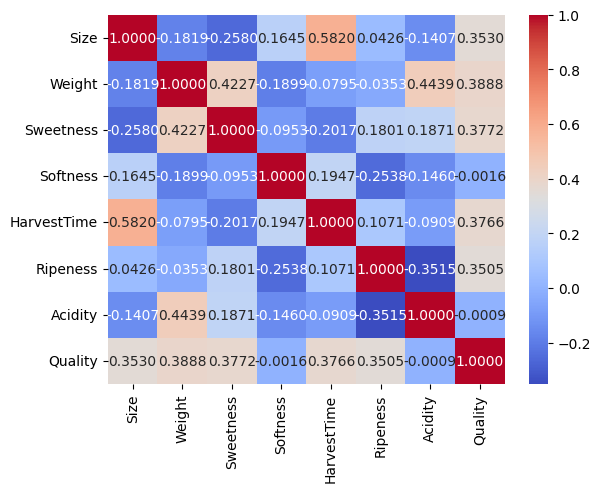

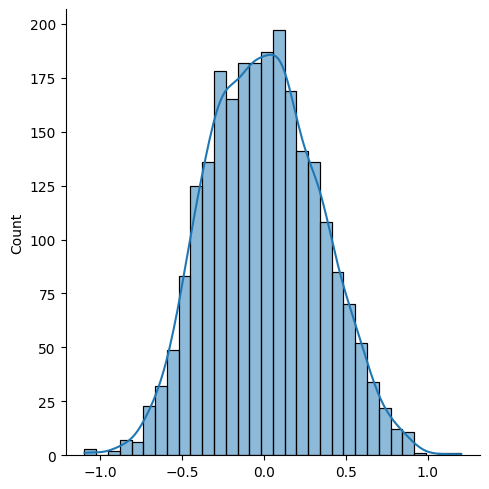

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns

# Extraer columnas de entrada (Size,Weight,Sweetness,HarvestTime,Ripeness)

x = data.iloc[:,0:7].values

# Extraer columna de Quality

y = data.iloc[:, 7].values

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.30)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

regression = LinearRegression()
regression.fit(X_train,Y_train)

reg_predict = regression.predict(X_test)

score = r2_score(reg_predict, Y_test)
print("Precision = ", float("{:.2f}".format(score*100)), "%")

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, Y_train)
boosted_score = gbr.score(X_test, Y_test)
print("Precision Mejorable = ", float("{:.2f}".format(boosted_score*100)), "%")

#Grafica y Correlacion

df = data.copy()
print("----------------------------------------------------")
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".4f")
sns.displot(reg_predict-Y_test, kde = True)

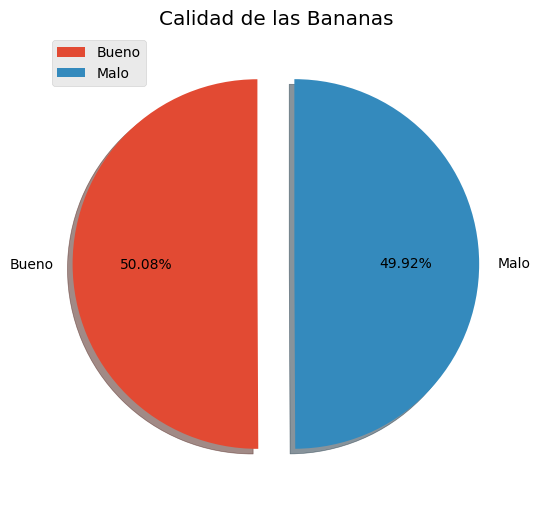

In [ ]:
#Grafica de porcentaje de bananas Buenas y Malas

import matplotlib.pyplot as plt

plt.figure(figsize=[6,6])
valores=["Bueno","Malo"]
plt.style.use('ggplot')
plt.title("Calidad de las Bananas")
plt.pie(data['Quality'].value_counts(),labels=valores,autopct='%.2f%%',shadow=True,explode=(0.1,0.1),startangle=90)
plt.axis=('equal')
plt.legend(loc="upper left")

plt.show()

In [48]:
np.random.seed(5) #Cargo la semilla

aprendizaje = 0.05  # tasa de aprendizaje

# Extraer columnas de entrada (Size,Weight,Sweetness,HarvestTime,Ripeness)

#entrada = data.iloc[:,[0,1,2,4,5]].values (Omitiendo la columna 3 y 6)
entrada = data.iloc[:,0:7].values #Todas las columnas excepto la ultima (Ingreso 7 entradas)

# Extraer columna de Quality
salida = data.iloc[:, 7].values

# Dividir los conjuntos de datos de entrenamiento y prueba
# 20 % en prueba y un 80 % en entrenamiento

X_train, X_test, Y_train, Y_test = train_test_split(entrada, salida,
    test_size=0.30)
n = X_train.shape[0]
print("se estan tomando",n,"Datos de entrenamiento")

# Construir red neuronal con pesos y sesgos inicializados aleatoriamente

w_hidden = np.random.rand(7, 7)
w_output = np.random.rand(1, 7)

b_hidden = np.random.rand(7, 1)
b_output = np.random.rand(1, 1)

# Funciones de activaciÃ³n

relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Ejecutar entradas a travÃ©s de la red neuronal para obtener salidas predichas

def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Derivadas de las funciones de activaciÃ³n

d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# Devuelve pendientes para pesos y sesgos usando la regla de la cadena

def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Descenso de Gradiente

for i in range(1_000_000):

    # selecciona aleatoriamente uno de los datos de entrenamiento

    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasamos los datos elegidos aleatoriamente a la red neuronal

    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a travÃ©s de la retropropagaciÃ³n
    # y devolver pendientes para pesos y sesgos

    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizamos los pesos y sesgos

    w_hidden -= aprendizaje * dW1
    b_hidden -= aprendizaje * dB1
    w_output -= aprendizaje * dW2
    b_output -= aprendizaje * dB2

# Calculo de precisiÃ³n

test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
print(test_predictions)
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
print(test_comparisons)
presicion = sum(test_comparisons.astype(int) / X_test.shape[0])
print("Precision: ", presicion)


se estan tomando 5600 Datos de entrenamiento
[[0.09445322 0.09445322 0.09445322 ... 0.09445322 0.09445322 0.09445322]]
[ True  True  True ...  True False  True]
Precision:  0.8816666666666327


In [57]:
#Ingreso de datos de la banana y su prediccion

def predict_probability(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity):
    X = np.array([[Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity]]).transpose()
    Z1, A1, Z2, A2 = forward_prop(X)
    return A2

def predict_font_shade(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity):
    output_values = predict_probability(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity)
    print(output_values)
    if output_values > .5:
        return "Bueno"
    else:
        return "Malo"

Size=float(input("Ingrese el TamaÃ±o:"))
Weight=float(input("Ingrese el Peso:"))
Sweetness=float(input("Ingrese la Sabor:"))
Softness=float(input("Ingrese la Blandura:"))
HarvestTime=float(input("Ingrese el Tiempo de Recoger:"))
Ripeness=float(input("Ingrese la Dureza:"))
Acidity=float(input("Ingrese la Acidez:"))
print("Tras el analisis la red neuronal determina que esa banana esta",predict_font_shade(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity))



Ingrese el TamaÃ±o:-1.4831107
Ingrese el Peso:-0.8823692
Ingrese la Sabor:0.96557415
Ingrese la Blandura:-4.695425
Ingrese el Tiempo de Recoger:-1.3529714
Ingrese la Dureza:3.3418584
Ingrese la Acidez:2.669173
[[1.]]
Tras el analisis la red neuronal determina que esa banana esta Bueno


In [49]:
# Comparacion usando scikit-learn

np.random.seed(5) #Cargo la semilla

# cargar datos
from sklearn.neural_network import MLPClassifier

# Extraer variables de entrada (todas las filas, todas las columnas menos la Ãºltima)
# Nota que deberÃ­amos hacer algÃºn escalado lineal aquÃ­
X = data.values[:,0:7]

# Extraer columna de salida (todas las filas, Ãºltima columna)
Y = data.values[:, 7]

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(7, ),
                   activation='relu',
                   max_iter=1_000_000,
                   learning_rate_init=0.05)

nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
print(nn.coefs_)
print(nn.intercepts_)

print("Puntaje del conjunto de entrenamiento: %f" % nn.score(X_train, Y_train))
print("Puntaje del conjunto de prueba: %f" % nn.score(X_test, Y_test))


[array([[ 0.1855423 , -0.25771569, -0.1355049 ,  0.3194105 ,  0.92406692,
         0.38243892, -0.62550396],
       [ 0.51522885,  1.18542529, -0.87058998, -1.08163119, -1.52455817,
        -0.7917107 ,  0.06377759],
       [-0.6467388 ,  1.08055102, -0.43771653, -0.46791682, -1.10021326,
        -0.02542919, -0.38070736],
       [-0.1668092 , -1.0146121 ,  1.28470996, -0.24071607,  1.3051782 ,
         0.83453973,  0.6497916 ],
       [ 0.62923419, -0.23465614,  0.45071041, -0.22164031,  0.90447592,
         0.35336913, -0.70795924],
       [ 0.28105684,  0.20519962,  0.48077773, -0.89843713, -0.99149701,
        -1.07756922, -0.97641662],
       [-0.79742522, -0.03430356,  0.71960941, -0.89315904, -0.78995855,
         0.11202351,  0.30125312]]), array([[-2.39437679],
       [ 0.95406453],
       [-1.14198105],
       [-1.50869007],
       [ 1.86720623],
       [-1.83495926],
       [-0.57409977]])]
[array([-2.90053711, -0.12574813,  0.72510276,  2.1568343 ,  0.98419343,
       -1.56